In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples

In [2]:
# データセット作成
X, y = make_blobs(
  n_samples=100,#サンプル点を100個準備
  n_features=2,#特徴量の個数
  centers=4,#クラスタの個数
  cluster_std=0.5,#クラスタ内の標準偏差
  shuffle=True,#サンプルをシャッフルする
  random_state=0)#乱数生成器の状態を指定する

# エルボー法

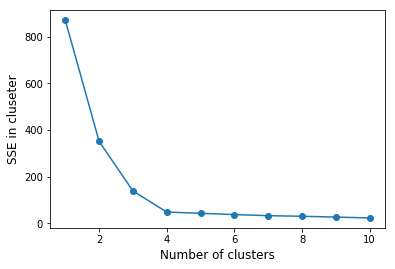

In [3]:
distortions = []
for i in range(1, 11):
     km = KMeans(n_clusters = i,
                          init='random',#ランダムにクラスタの中心を選択
                          n_init=10,#異なる重心の初期値を用いたk-meansアルゴリズムの実行回数
                          max_iter=300,
                          random_state=0)
    
     km.fit(X)
     distortions.append(km.inertia_)#SSE(クラスタ内誤差平方和)は、inertia_属性を用いて確認できる

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters', fontsize=12)
plt.ylabel('SSE in cluseter', fontsize=12)
plt.show()

# K-Means実行

In [4]:
#k-meansをサンプルデータセットに適用する
km = KMeans(n_clusters=4,#クラスタの個数
                      init='random',#重心（クラスタの中心）の初期値をランダムに選択
                      random_state=0)

#クラスタ中心の計算と各サンプルのインデックスの予測を行う
y_km = km.fit_predict(X)

# 結果をプロット

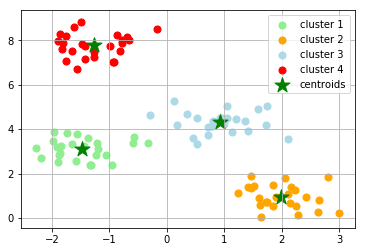

In [5]:
#k-meansがデータセットから識別したクラスタとクラスタの重心をプロットする

#各クラスタを描画する
plt.scatter(X[y_km==0, 0],
                  X[y_km==0, 1],
                  s=50,#プロットのサイズ
                  c='lightgreen',#プロットの色
                  marker='o',#マーカーの形
                  label='cluster 1')#ラベル名

plt.scatter(X[y_km==1, 0],
                  X[y_km==1, 1],
                  s=50,#プロットのサイズ
                  c='orange',#プロットの色
                  marker='o',#マーカーの形
                  label='cluster 2')#ラベル名

plt.scatter(X[y_km==2, 0],
                  X[y_km==2, 1],
                  s=50,#プロットのサイズ
                  c='lightblue',#プロットの色
                  marker='o',#マーカーの形
                  label='cluster 3')#ラベル名

plt.scatter(X[y_km==3, 0],
                  X[y_km==3, 1],
                  s=50,#プロットのサイズ
                  c='red',#プロットの色
                  marker='o',#マーカーの形
                  label='cluster 4')#ラベル名

#クラスタの重心を描画する
plt.scatter(km.cluster_centers_[:, 0],
                  km.cluster_centers_[:, 1],
                  s=250,
                  marker='*',
                  c='green',
                  label='centroids')

plt.legend()
plt.grid()
plt.show()

# シルエット分析

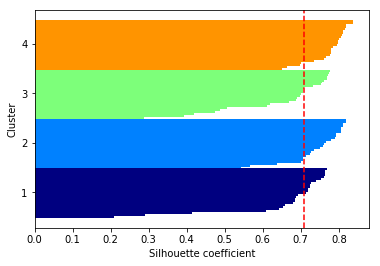

In [6]:
#y_kmの要素の中で重複をなくす
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

#各クラスタについて、データポイントごとにシルエット係数を計算する
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color  = cm.jet(float(i) / n_clusters)#色の値をセット
    plt.barh(range(y_ax_lower, y_ax_upper),#水平の棒グラフを描画（底辺の範囲を指定）
           c_silhouette_vals,#棒の幅を指定
           height=1.0,#棒の高さを指定
           edgecolor='none',
           color=color)#棒の色を指定
    
    #クラスタラベルの表示位置を追加
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    
    #底辺の値に棒の幅を追加
    y_ax_lower += len(c_silhouette_vals)
    
 #シルエット係数の平均値
silhouette_avg = np.mean(silhouette_vals)

#シルエット係数の平均値に破線をひく
plt.axvline(silhouette_avg, color='red', linestyle='--')

#y軸にクラスタラベルを表示する
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()